___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Multivariate Time Series Forecasting with RNN<br><br>Demand Prediction Project (Bike Sharing)<br><h1>

# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*
    
- Drop unnecessary columns
    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Evaluate on Test Data

- Inverse Transform
- Plot Prediction

#### 5. Retrain and Forecasting

## Improt Libraries and Indest Data

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [1]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/RNN_project_Mutivariate_Time_Series_with_RNN_(Bike_Sharing_Demand_Prediction)/store_sharing.csv", parse_dates=['timestamp'], index_col='timestamp')

In [5]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.000,1.000,81.000,19.000,3.000,0.000,0.000,3.000
2017-01-03 20:00:00,541,5.000,1.000,81.000,21.000,4.000,0.000,0.000,3.000
2017-01-03 21:00:00,337,5.500,1.500,78.500,24.000,4.000,0.000,0.000,3.000


---
---

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [6]:
df.info() # check the data type

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [7]:
df.isnull().sum() # check the missing values

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
df.duplicated().sum() # check the duplicated values

2

In [9]:
df.describe().T # check the data distribution

,count,mean,std,min,25%,50%,75%,max
cnt,17414.000,1143.102,1085.108,0.000,257.000,844.000,1671.750,7860.000
t1,17414.000,12.468,5.572,-1.500,8.000,12.500,16.000,34.000
t2,17414.000,11.521,6.615,-6.000,6.000,12.500,16.000,34.000
hum,17414.000,72.325,14.313,20.500,63.000,74.500,83.000,100.000
wind_speed,17414.000,15.913,7.895,0.000,10.000,15.000,20.500,56.500
weather_code,17414.000,2.723,2.341,1.000,1.000,2.000,3.000,26.000
is_holiday,17414.000,0.022,0.147,0.000,0.000,0.000,0.000,1.000
is_weekend,17414.000,0.285,0.452,0.000,0.000,0.000,1.000,1.000
season,17414.000,1.492,1.119,0.000,0.000,1.000,2.000,3.000


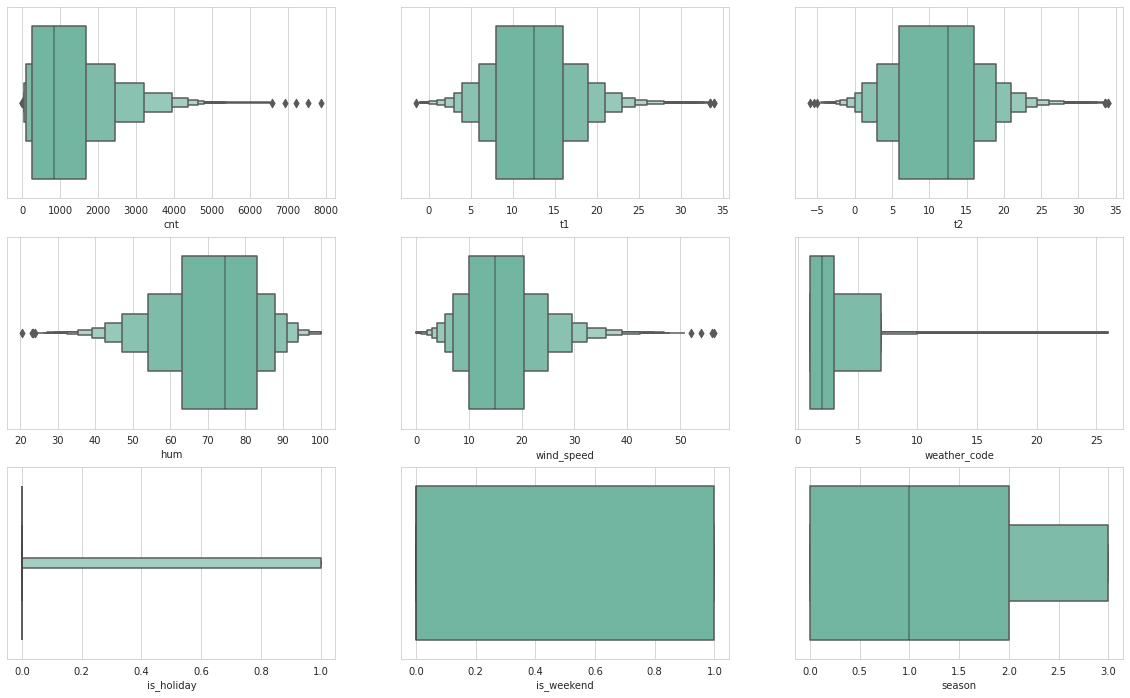

In [10]:
plt.figure(figsize=(20,12))                                 # plot the data
index = 0
for feature in df.columns:
    index += 1
    plt.subplot(3,3,index)
    sns.boxenplot(x=feature, data=df, palette="Set2")

### Plot Breakdowns of Data

In [11]:
df["date"] = df.index.date                                              # add a new column for date
df ["year"] = df.index.year                                             # add a new column for year
df ["month"] = df.index.month                                           # add a new column for month
df ["day"] = df.index.day                                               # add a new column for day  
df ["dayofmonth"] = df.index.day                                        # add a new column for day of month
df ["dayofweek"] = df.index.dayofweek                                   # add a new column for day of week         
df ["hour"] = df.index.hour                                             # add a new column for hour

In [12]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year,month,day,dayofmonth,dayofweek,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,0
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,1
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,2
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,3
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,4


In [13]:
df ["season_name"] = df.index.month.map(lambda x: "spring" if x in [3,4,5] else "summer" if x in [6,7,8] else "fall" if x in [9,10,11] else "winter") # add a new column for season
# df['season_name'] = df['season'].replace({0:"spring", 1:"summer", 2:"fall", 3:"winter"})

In [14]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year,month,day,dayofmonth,dayofweek,hour,season_name
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,0,winter
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,1,winter
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,2,winter
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,3,winter
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.000,1.000,81.000,19.000,3.000,0.000,0.000,3.000,2017-01-03,2017,1,3,3,1,19,winter
2017-01-03 20:00:00,541,5.000,1.000,81.000,21.000,4.000,0.000,0.000,3.000,2017-01-03,2017,1,3,3,1,20,winter
2017-01-03 21:00:00,337,5.500,1.500,78.500,24.000,4.000,0.000,0.000,3.000,2017-01-03,2017,1,3,3,1,21,winter


***i. Plot bike shares over time***

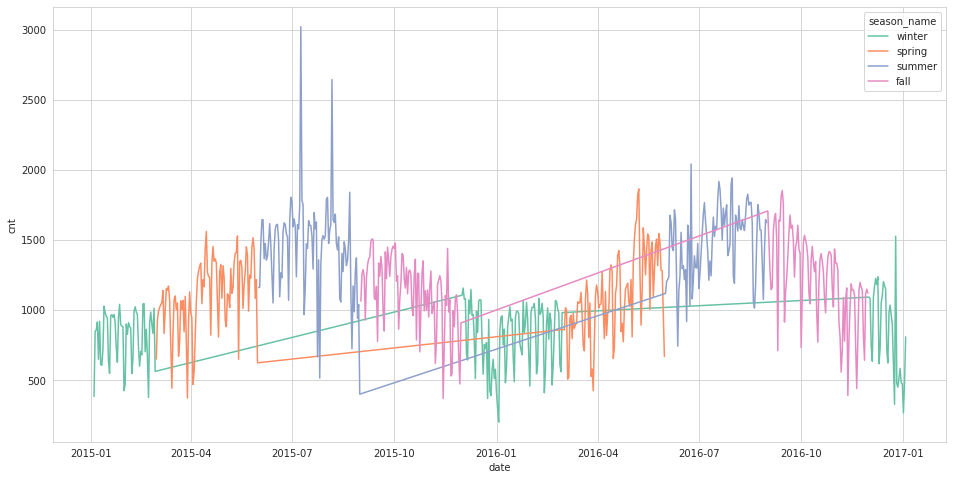

In [15]:
plt.figure(figsize=(16,8))                                 # plot the data
sns.lineplot(x="date", y="cnt", data=df, palette="Set2", hue="season_name", ci=None)

***ii. Plot bike shares by months***

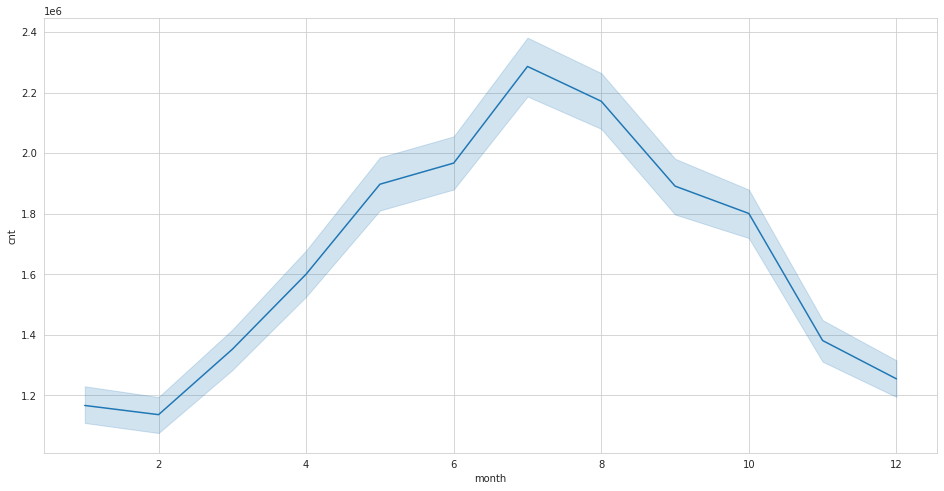

In [16]:
plt.figure(figsize = (16,8))
sns.lineplot(x ="month", y = "cnt", data = df, estimator= "sum");

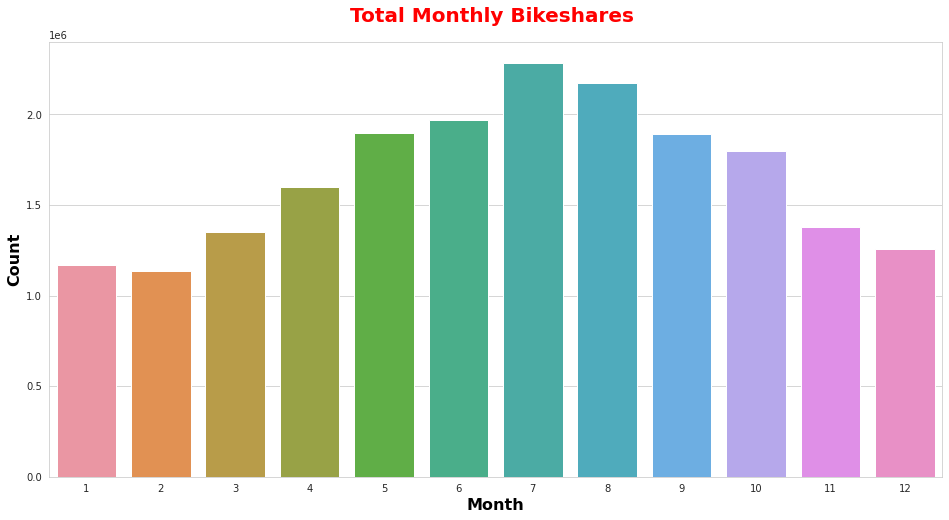

In [17]:
plt.figure(figsize = (16,8))
sns.barplot(x = "month", y = "cnt", data = df, ci =None, estimator = np.sum);
plt.xlabel("Month", fontsize = 16, color = "black", fontweight = "bold")
plt.ylabel("Count", fontsize = 16, color = "black", fontweight = "bold")
plt.title("Total Monthly Bikeshares ", fontsize = 20, fontweight = "bold", color = "red", pad = 20);

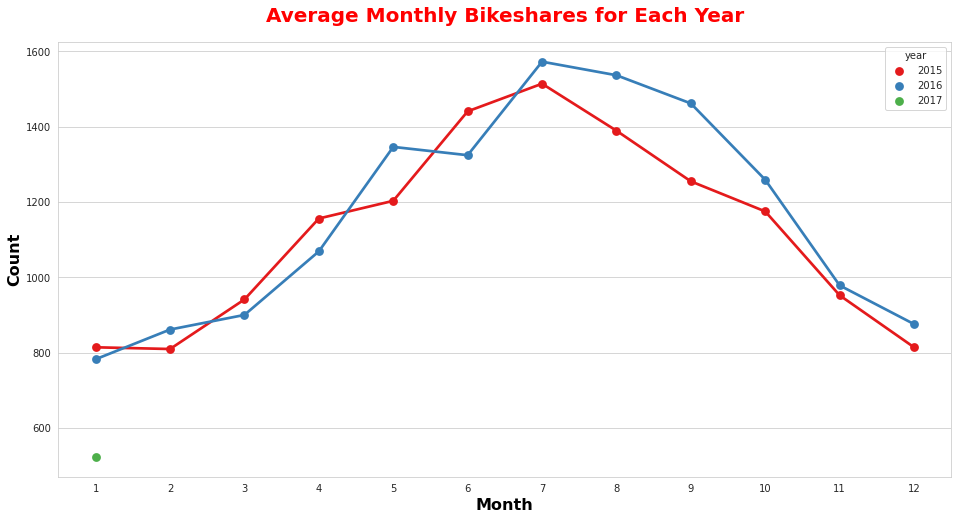

In [18]:
year_month_count = df.groupby(["year", "month"]).agg({"cnt": "mean"}).reset_index()
plt.figure(figsize = (16,8))
sns.pointplot(x = "month", y = "cnt", data = year_month_count, hue = "year", palette = "Set1", estimator=np.mean)

plt.xlabel("Month", fontsize = 16, color = "black", fontweight = "bold")
plt.ylabel("Count", fontsize = 16, color = "black", fontweight = "bold")
plt.title("Average Monthly Bikeshares for Each Year", fontsize = 20, fontweight = "bold", color = "red", pad = 20);

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

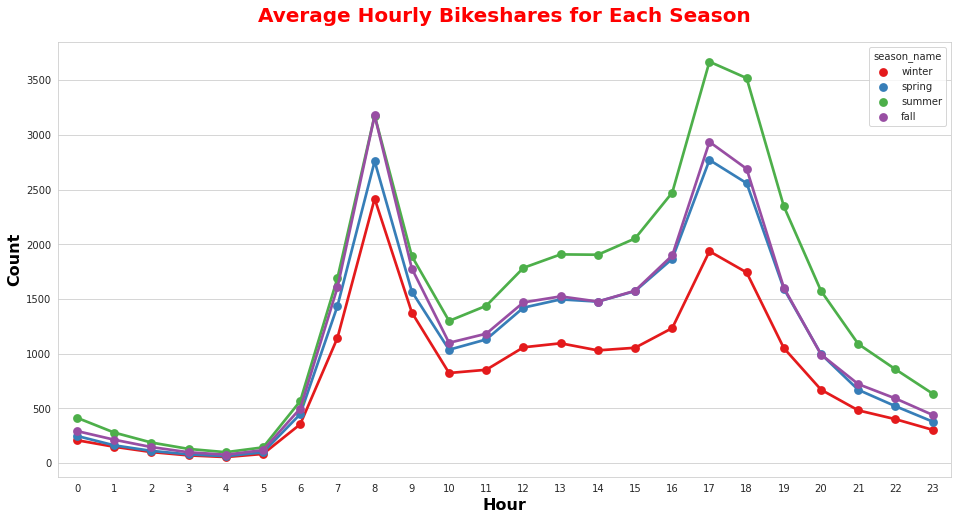

In [19]:
plt.figure(figsize = (16,8))
sns.pointplot(x = "hour", y = "cnt", data = df, hue = "season_name", palette = "Set1",ci=None)

plt.xlabel("Hour", fontsize = 16, color = "black", fontweight = "bold")
plt.ylabel("Count", fontsize = 16, color = "black", fontweight = "bold")
plt.title("Average Hourly Bikeshares for Each Season", fontsize = 20, fontweight = "bold", color = "red", pad = 20);

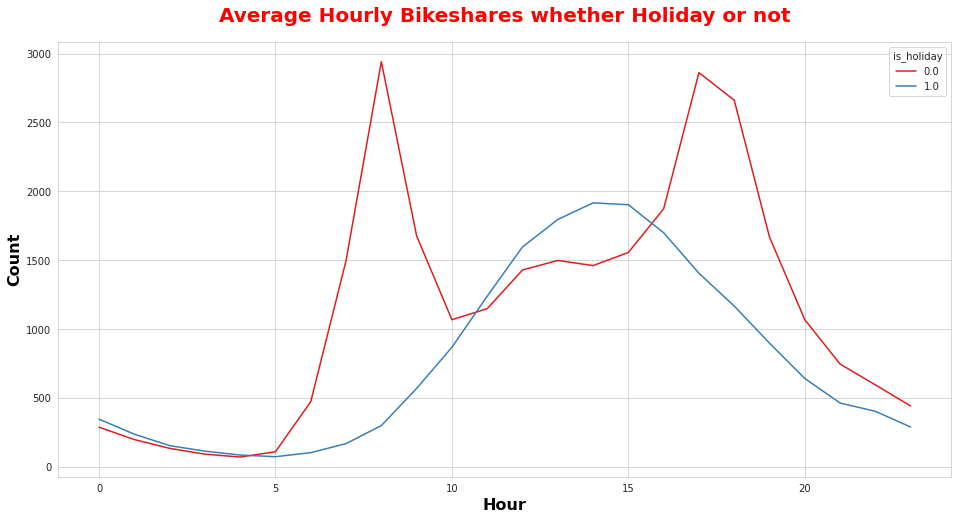

In [20]:
plt.figure(figsize = (16,8))
sns.lineplot(x = "hour", y = "cnt", data = df, hue = "is_holiday", palette = "Set1",ci=None)

plt.xlabel("Hour", fontsize = 16, color = "black", fontweight = "bold")
plt.ylabel("Count", fontsize = 16, color = "black", fontweight = "bold")
plt.title("Average Hourly Bikeshares whether Holiday or not", fontsize = 20, fontweight = "bold", color = "red", pad = 20);

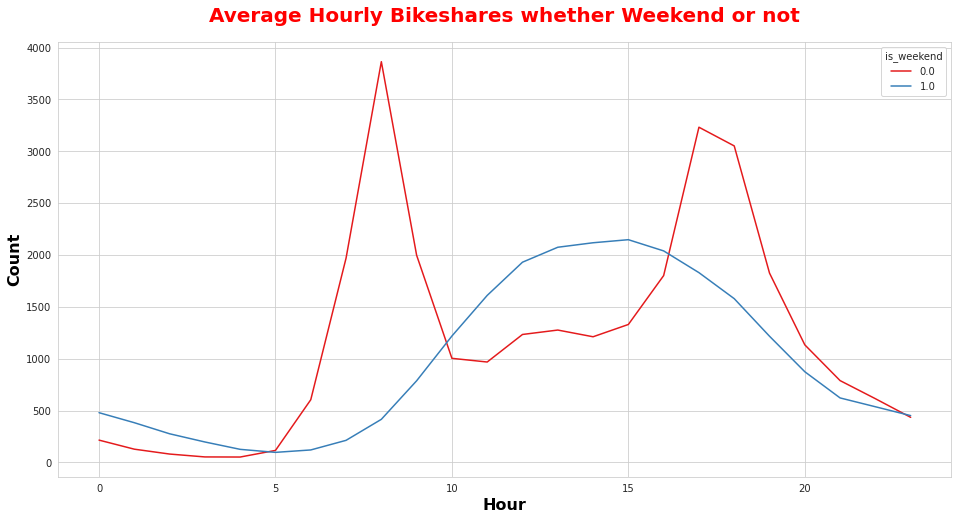

In [21]:
plt.figure(figsize = (16,8))
sns.lineplot(x = "hour", y = "cnt", data = df, hue = "is_weekend", palette = "Set1",ci=None)

plt.xlabel("Hour", fontsize = 16, color = "black", fontweight = "bold")
plt.ylabel("Count", fontsize = 16, color = "black", fontweight = "bold")
plt.title("Average Hourly Bikeshares whether Weekend or not", fontsize = 20, fontweight = "bold", color = "red", pad = 20);

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

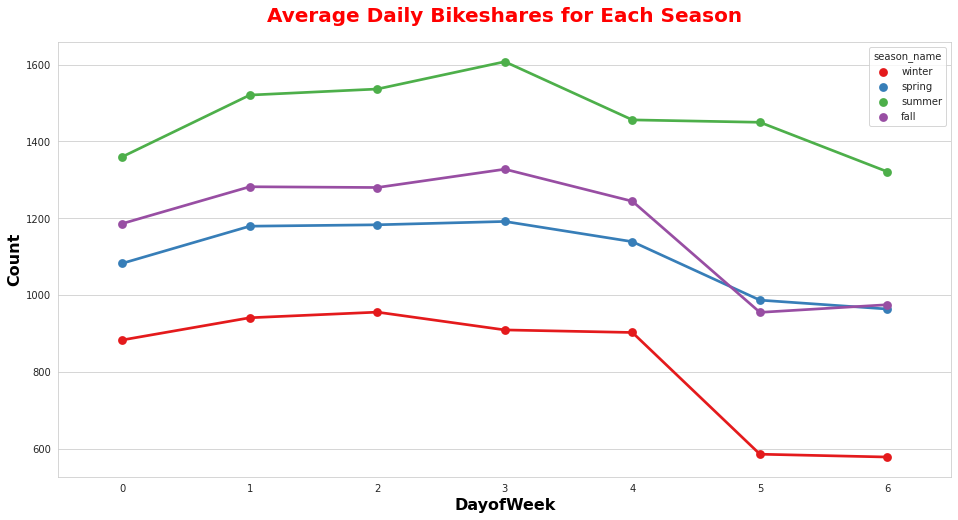

In [22]:
plt.figure(figsize = (16,8))
sns.pointplot(x = "dayofweek", y = "cnt", data = df, hue = "season_name", palette = "Set1",ci=None)

plt.xlabel("DayofWeek", fontsize = 16, color = "black", fontweight = "bold")
plt.ylabel("Count", fontsize = 16, color = "black", fontweight = "bold")
plt.title("Average Daily Bikeshares for Each Season", fontsize = 20, fontweight = "bold", color = "red", pad = 20);

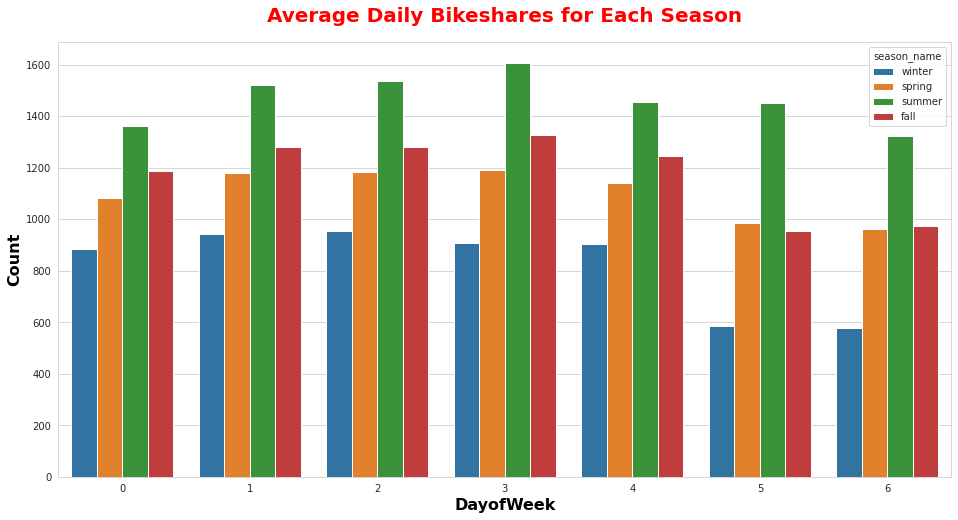

In [23]:
plt.figure(figsize = (16,8))
sns.barplot(x = "dayofweek", y = "cnt", data = df, ci =None,hue="season_name")
plt.xlabel("DayofWeek", fontsize = 16, color = "black", fontweight = "bold")
plt.ylabel("Count", fontsize = 16, color = "black", fontweight = "bold")
plt.title("Average Daily Bikeshares for Each Season", fontsize = 20, fontweight = "bold", color = "red", pad = 20);

***v. Plot the distribution of bike shares on holidays by seasons***

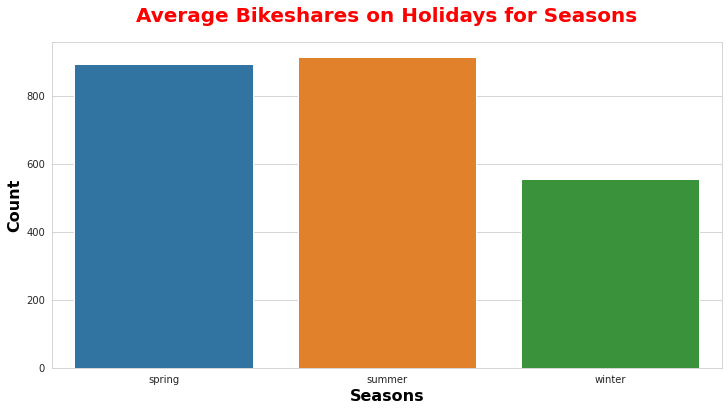

In [24]:
is_holiday = df[df.is_holiday == 1.0]

plt.figure(figsize = (12,6))
sns.barplot(data = is_holiday, x = "season_name", y = "cnt", ci=None)
plt.xlabel("Seasons", fontsize = 16, color = "black", fontweight = "bold")
plt.ylabel("Count", fontsize = 16, color = "black", fontweight = "bold")
plt.title("Average Bikeshares on Holidays for Seasons", fontsize = 20, fontweight = "bold", color = "red", pad = 20);

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

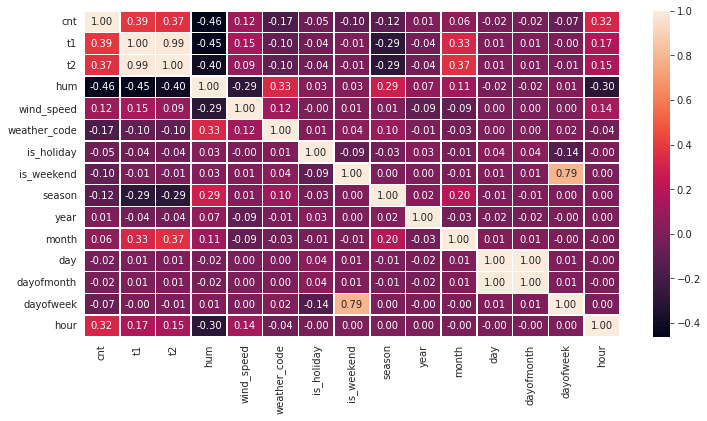

In [25]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f', linecolor='white')

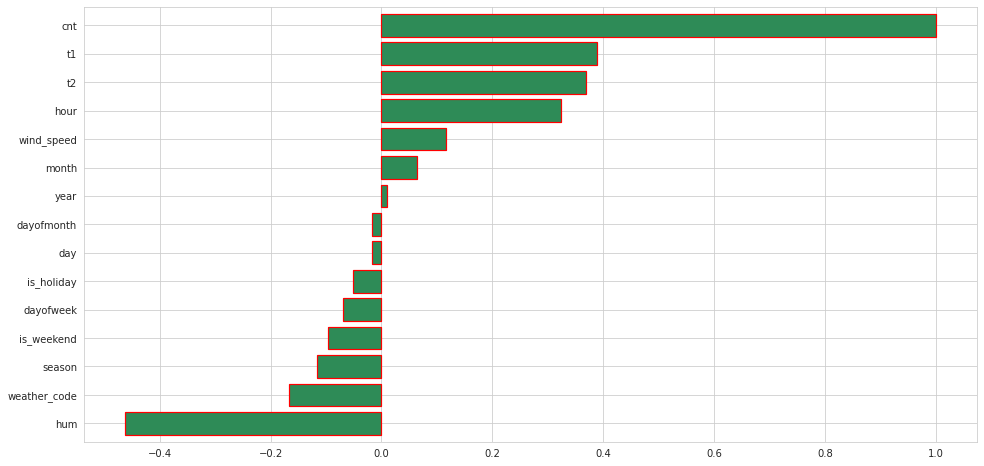

In [26]:
plt.figure(figsize = (16,8))
df.corr()["cnt"].sort_values().plot.barh(width=0.8, color= "seagreen", linewidth = 1.2, edgecolor = "red")

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

In [27]:
df["weather_code"].value_counts() # count the number of weather code

1.000     6150
2.000     4034
3.000     3551
7.000     2141
4.000     1464
26.000      60
10.000      14
Name: weather_code, dtype: int64

AttributeError: ignored

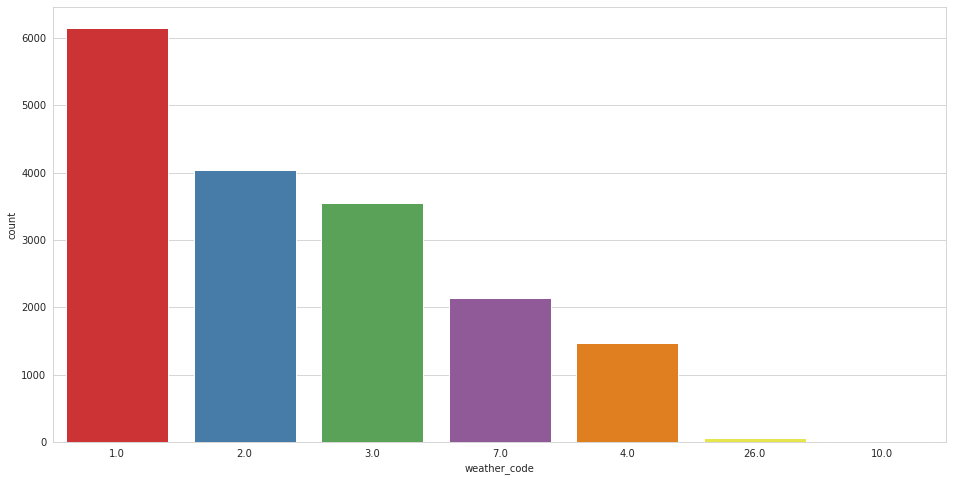

In [30]:
plt.figure(figsize = (16,8))
ax = sns.countplot(x = "weather_code", data = df, palette = "Set1", order = df["weather_code"].value_counts().index)
ax.bar_label(ax.containers[0], fontsize = 16, fontweight = "bold", color = "black");

In [31]:
df.weather_code = df.weather_code.map({1:'clear',2:'scattered_clouds',          # map the weather code to the weather description
                     3:'broken_cloud',4:'cloudy',
                     7:'light_rain',10:'rain_thunderstorm',26:'snowfall'})
df.weather_code 

timestamp
2015-01-04 00:00:00        broken_cloud
2015-01-04 01:00:00               clear
2015-01-04 02:00:00               clear
2015-01-04 03:00:00               clear
2015-01-04 04:00:00               clear
                             ...       
2017-01-03 19:00:00        broken_cloud
2017-01-03 20:00:00              cloudy
2017-01-03 21:00:00              cloudy
2017-01-03 22:00:00              cloudy
2017-01-03 23:00:00    scattered_clouds
Name: weather_code, Length: 17414, dtype: object

In [32]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year,month,day,dayofmonth,dayofweek,hour,season_name
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,broken_cloud,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,0,winter
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,clear,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,1,winter
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,clear,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,2,winter
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,clear,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,3,winter
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,clear,0.000,1.000,3.000,2015-01-04,2015,1,4,4,6,4,winter


In [33]:
df.drop(["t2","season","date", "year", "month", "day", "dayofmonth","dayofweek",], axis = 1, inplace = True) # drop unnecessary columns
df.head()

,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,hour,season_name
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,93.000,6.000,broken_cloud,0.000,1.000,0,winter
2015-01-04 01:00:00,138,3.000,93.000,5.000,clear,0.000,1.000,1,winter
2015-01-04 02:00:00,134,2.500,96.500,0.000,clear,0.000,1.000,2,winter
2015-01-04 03:00:00,72,2.000,100.000,0.000,clear,0.000,1.000,3,winter
2015-01-04 04:00:00,47,2.000,93.000,6.500,clear,0.000,1.000,4,winter


In [34]:
df = pd.get_dummies(df, drop_first=True) # one hot encoding

In [35]:
df.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_name_spring,season_name_summer,season_name_winter
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,93.000,6.000,0.000,1.000,0,0,0,0,0,0,0,0,0,1
2015-01-04 01:00:00,138,3.000,93.000,5.000,0.000,1.000,1,1,0,0,0,0,0,0,0,1
2015-01-04 02:00:00,134,2.500,96.500,0.000,0.000,1.000,2,1,0,0,0,0,0,0,0,1
2015-01-04 03:00:00,72,2.000,100.000,0.000,0.000,1.000,3,1,0,0,0,0,0,0,0,1
2015-01-04 04:00:00,47,2.000,93.000,6.500,0.000,1.000,4,1,0,0,0,0,0,0,0,1


In [36]:
df.shape

(17414, 16)

In [37]:
df.duplicated().sum() # check for duplicates  

1

In [38]:
df.drop_duplicates(inplace = True) # drop duplicates

In [39]:
df.duplicated().sum() # check for duplicates

0

In [40]:
df.shape

(17413, 16)

## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

In [41]:
len(df) # check the length of the dataframe

17413

In [42]:
# how many rows are per day
24

24

In [43]:
test_day = 60
test_ind = test_day*24
test_ind

1440

In [44]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [45]:
train.shape, test.shape

((15973, 16), (1440, 16))

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

In [46]:
from sklearn.preprocessing import RobustScaler

In [47]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
target_transformer = target_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = target_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = target_transformer.transform(test[['cnt']])

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [48]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: target value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)  

In [49]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15949, 24, 16) (15949,)
(1416, 24, 16) (1416,)


In [50]:
y_test

array([-0.3030303 , -0.35743802, -0.39876033, ..., -0.36088154,
       -0.43870523, -0.49724518])

---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






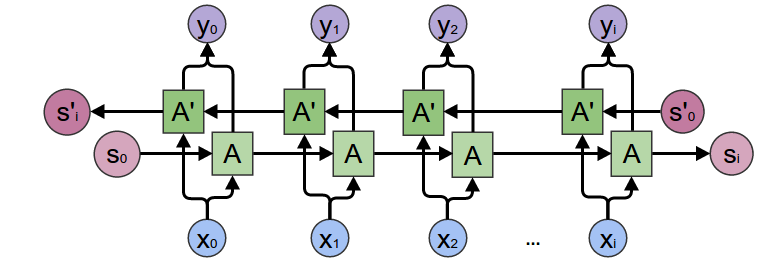

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
n_features = X_train.shape[2] # number of features

In [53]:
model = Sequential()                                                            # create model
model.add(Bidirectional(LSTM(128,  input_shape=(time_steps, n_features))))       # add LSTM layer
# model.add(Dropout(0.2))                                                         # add dropout layer
model.add(Dense(1))                                                             # add dense layer                                           
model.compile(optimizer='adam', loss='mse')                                     # compile model

In [54]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights= True)            # add early stopping

In [55]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])         # fit model

Epoch 1/100
399/399 [==============================] - 14s 13ms/step - loss: 0.1234 - val_loss: 0.0510
Epoch 2/100
399/399 [==============================] - 4s 10ms/step - loss: 0.0332 - val_loss: 0.0355
Epoch 3/100
399/399 [==============================] - 4s 10ms/step - loss: 0.0215 - val_loss: 0.0229
Epoch 4/100
399/399 [==============================] - 3s 8ms/step - loss: 0.0189 - val_loss: 0.0239
Epoch 5/100
399/399 [==============================] - 3s 8ms/step - loss: 0.0172 - val_loss: 0.0221
Epoch 6/100
399/399 [==============================] - 4s 11ms/step - loss: 0.0159 - val_loss: 0.0216
Epoch 7/100
399/399 [==============================] - 5s 12ms/step - loss: 0.0152 - val_loss: 0.0217
Epoch 8/100
399/399 [==============================] - 5s 13ms/step - loss: 0.0147 - val_loss: 0.0269
Epoch 9/100
399/399 [==============================] - 5s 12ms/step - loss: 0.0145 - val_loss: 0.0196
Epoch 10/100
399/399 [==============================] - 5s 13ms/step - loss: 0.0134

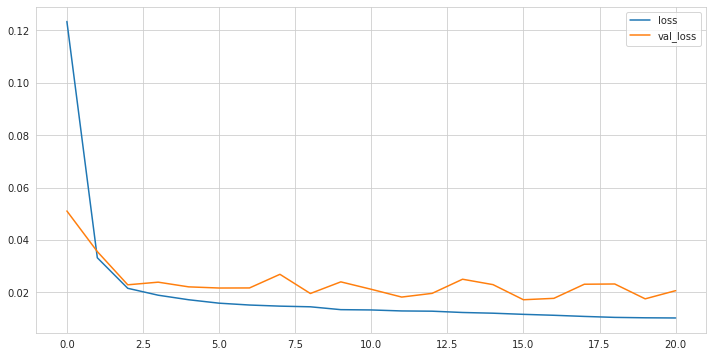

In [56]:
losses = pd.DataFrame(model.history.history)
losses.plot()

---
---

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be use for next prediction¶

In [59]:
y_pred = model.predict(X_test)

In [60]:
eval_metrics(y_test, y_pred)

r2_score: 0.9706461819731447 
mae: 0.06065864837310439 
mse: 0.010696152121383194 
rmse: 0.10342220323210675


### Inverse Transformation and Compare

In [61]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))        # inverse transform
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))          # inverse transform  
y_pred_inv = target_transformer.inverse_transform(y_pred)                         # inverse transform

In [62]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test

,test,prediction
timestamp,,
2016-11-05 23:00:00,421.000,344.064
2016-11-06 00:00:00,342.000,282.114
2016-11-06 01:00:00,282.000,282.055
2016-11-06 02:00:00,182.000,220.429
2016-11-06 03:00:00,137.000,147.970
...,...,...
2017-01-03 19:00:00,1042.000,1070.215
2017-01-03 20:00:00,541.000,572.463
2017-01-03 21:00:00,337.000,326.922


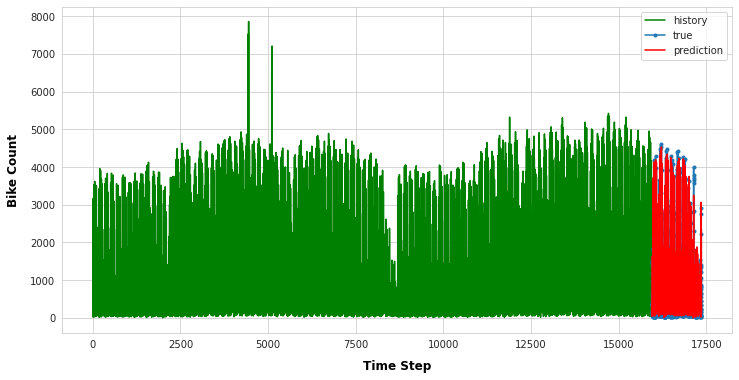

In [63]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.xlabel('Time Step', fontsize=12, color='black', fontweight='bold', labelpad=10)
plt.legend()
plt.show();

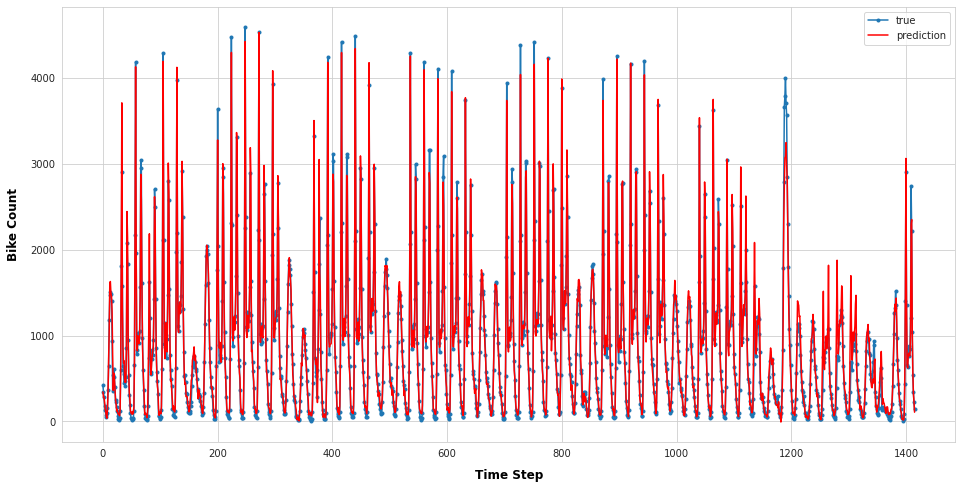

In [64]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.xlabel('Time Step', fontsize=12, color='black', fontweight='bold', labelpad=10)
plt.legend()
plt.show();

### Second way : after each prediction, result will be use for next prediction

In [65]:
test

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_name_spring,season_name_summer,season_name_winter
timestamp,,,,,,,,,,,,,,,,
2016-11-04 23:00:00,-0.271,-0.750,0.675,-0.182,0.000,0.000,23,1,0,0,0,0,0,0,0,0
2016-11-05 00:00:00,-0.381,-0.812,0.675,-0.364,0.000,1.000,0,1,0,0,0,0,0,0,0,0
2016-11-05 01:00:00,-0.384,-0.875,0.675,-0.182,0.000,1.000,1,1,0,0,0,0,0,0,0,0
2016-11-05 02:00:00,-0.462,-1.000,0.975,-0.182,0.000,1.000,2,1,0,0,0,0,0,0,0,0
2016-11-05 03:00:00,-0.491,-1.000,0.825,-0.091,0.000,1.000,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,0.125,-1.000,0.375,0.364,0.000,0.000,19,0,0,0,0,0,0,0,0,1
2017-01-03 20:00:00,-0.220,-1.000,0.375,0.545,0.000,0.000,20,0,1,0,0,0,0,0,0,1
2017-01-03 21:00:00,-0.361,-0.938,0.250,0.818,0.000,0.000,21,0,1,0,0,0,0,0,0,1


In [66]:
df_fake = test.iloc[:time_steps,1:]                                     # create fake dataframe
df_fake

,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_name_spring,season_name_summer,season_name_winter
timestamp,,,,,,,,,,,,,,,
2016-11-04 23:00:00,-0.750,0.675,-0.182,0.000,0.000,23,1,0,0,0,0,0,0,0,0
2016-11-05 00:00:00,-0.812,0.675,-0.364,0.000,1.000,0,1,0,0,0,0,0,0,0,0
2016-11-05 01:00:00,-0.875,0.675,-0.182,0.000,1.000,1,1,0,0,0,0,0,0,0,0
2016-11-05 02:00:00,-1.000,0.975,-0.182,0.000,1.000,2,1,0,0,0,0,0,0,0,0
2016-11-05 03:00:00,-1.000,0.825,-0.091,0.000,1.000,3,0,0,0,0,0,0,0,0,0
2016-11-05 04:00:00,-1.000,0.675,0.000,0.000,1.000,4,0,1,0,0,0,0,0,0,0
2016-11-05 05:00:00,-0.938,0.825,-0.182,0.000,1.000,5,0,0,1,0,0,0,0,0,0
2016-11-05 06:00:00,-0.875,0.525,-0.273,0.000,1.000,6,0,0,0,0,0,0,0,0,0
2016-11-05 07:00:00,-0.812,0.250,0.091,0.000,1.000,7,0,0,0,0,0,0,0,0,0


In [67]:
reel = np.array(test.iloc[:time_steps,:1])                # create reel array
reel.reshape((1,-1))[0]

array([-0.27134986, -0.38085399, -0.38429752, -0.46212121, -0.49104683,
       -0.52410468, -0.53443526, -0.51239669, -0.40151515, -0.23553719,
        0.08677686,  0.24380165,  0.40495868,  0.51790634,  0.61983471,
        0.60881543,  0.49931129,  0.43663912,  0.28099174,  0.08539945,
        0.07644628, -0.06818182, -0.14118457, -0.27892562])

In [68]:
df_fake.shape                                          # check shape

(24, 15)

In [69]:
df_fake.values.reshape((df_fake.shape[0],1,df_fake.shape[1])).shape

(24, 1, 15)

In [70]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

In [71]:
predictions_scaled

[array([-0.32041925], dtype=float32),
 array([-0.41163325], dtype=float32),
 array([-0.40566516], dtype=float32),
 array([-0.4032963], dtype=float32),
 array([-0.4088276], dtype=float32),
 array([-0.41181177], dtype=float32),
 array([-0.41371042], dtype=float32),
 array([-0.3909787], dtype=float32),
 array([-0.2747476], dtype=float32),
 array([-0.12029999], dtype=float32),
 array([0.10864418], dtype=float32),
 array([0.3589942], dtype=float32),
 array([0.55144155], dtype=float32),
 array([0.6598818], dtype=float32),
 array([0.7091271], dtype=float32),
 array([0.7106198], dtype=float32),
 array([0.66234094], dtype=float32),
 array([0.54217595], dtype=float32),
 array([0.3667884], dtype=float32),
 array([0.1440947], dtype=float32),
 array([-0.05149781], dtype=float32),
 array([-0.2118728], dtype=float32),
 array([-0.3315048], dtype=float32),
 array([-0.34565282], dtype=float32)]

In [72]:
reel

array([[-0.27134986],
       [-0.38085399],
       [-0.38429752],
       [-0.46212121],
       [-0.49104683],
       [-0.52410468],
       [-0.53443526],
       [-0.51239669],
       [-0.40151515],
       [-0.23553719],
       [ 0.08677686],
       [ 0.24380165],
       [ 0.40495868],
       [ 0.51790634],
       [ 0.61983471],
       [ 0.60881543],
       [ 0.49931129],
       [ 0.43663912],
       [ 0.28099174],
       [ 0.08539945],
       [ 0.07644628],
       [-0.06818182],
       [-0.14118457],
       [-0.27892562]])

In [73]:
eval_metrics(reel, predictions_scaled)  # check metrics

r2_score: 0.9233423082263904 
mae: 0.09987736571386892 
mse: 0.01188421919203126 
rmse: 0.10901476593577249


### Inverse Transformation and Compare

In [74]:
predictions = target_transformer.inverse_transform(predictions_scaled)   # inverse transform  predictions
reel = target_transformer.inverse_transform(reel)                        # inverse transform  reel

In [75]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])    # create compare dataframe
compare["prediction"] = predictions
compare

,reel,prediction
timestamp,,
2016-11-04 23:00:00,467.000,395.751
2016-11-05 00:00:00,308.000,263.309
2016-11-05 01:00:00,303.000,271.974
2016-11-05 02:00:00,190.000,275.414
2016-11-05 03:00:00,148.000,267.382
2016-11-05 04:00:00,100.000,263.049
2016-11-05 05:00:00,85.000,260.292
2016-11-05 06:00:00,117.000,293.299
2016-11-05 07:00:00,278.000,462.066


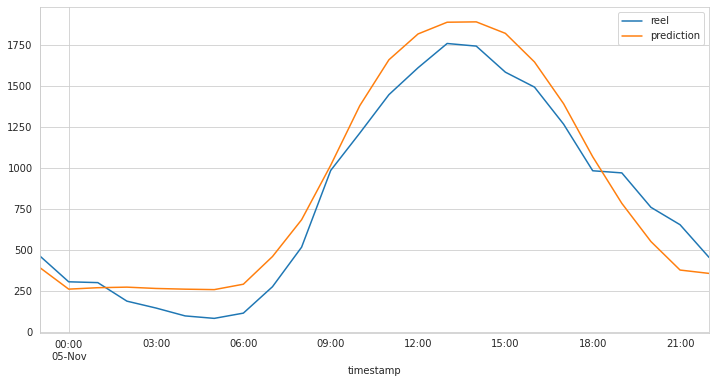

In [76]:
compare.plot(figsize=(12,6))  # plot compare

## 5. Retrain and Forecasting

### Scale full data

In [77]:
df_scaled = df.copy()                                          # create copy of df

In [78]:
f_columns = ['t1', 'hum', 'wind_speed']                                                 # define features

f_transformer = RobustScaler()                                                          # create transformer features
target_transformer = RobustScaler()                                                     # create transformer target

df_scaled.loc[:, f_columns] = f_transformer.fit_transform(df_scaled[f_columns])         # fit and transform features
df_scaled['cnt'] = target_transformer.fit_transform(df_scaled[['cnt']])                 # fit and transform target

In [79]:
df_scaled.head()                                              # check head

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_name_spring,season_name_summer,season_name_winter
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.468,-1.188,0.925,-0.857,0.000,1.000,0,0,0,0,0,0,0,0,0,1
2015-01-04 01:00:00,-0.499,-1.188,0.925,-0.952,0.000,1.000,1,1,0,0,0,0,0,0,0,1
2015-01-04 02:00:00,-0.502,-1.250,1.100,-1.429,0.000,1.000,2,1,0,0,0,0,0,0,0,1
2015-01-04 03:00:00,-0.546,-1.312,1.275,-1.429,0.000,1.000,3,1,0,0,0,0,0,0,0,1
2015-01-04 04:00:00,-0.563,-1.312,0.925,-0.810,0.000,1.000,4,1,0,0,0,0,0,0,0,1


In [80]:
val_size = 24                               # define validation size
val = df_scaled.iloc[-val_size:]            # create validation dataframe
full = df_scaled.iloc[:-val_size]           # create full dataframe
print(len(full), len(val))                  # check length

17389 24


### reshape to [samples, time_steps, n_features]

In [81]:
X,y = create_dataset(full, full.cnt, time_steps)       # create X and y
print(X.shape, y.shape)                                # check shape

(17365, 24, 16) (17365,)


### Create Final model with full data 

In [82]:
model = Sequential()                                                            # create model
model.add(Bidirectional(LSTM(128,  input_shape=(time_steps, n_features))))      # add LSTM layer
# model.add(Dropout(0.2))                                                       # add dropout layer
model.add(Dense(1))                                                             # add dense layer                                           
model.compile(optimizer='adam', loss='mse')                                     # compile model

In [83]:
model.fit(X, y, epochs=16, batch_size=24, verbose=1)       # fit model

Epoch 1/16
724/724 [==============================] - 9s 7ms/step - loss: 0.0967
Epoch 2/16
724/724 [==============================] - 4s 6ms/step - loss: 0.0245
Epoch 3/16
724/724 [==============================] - 4s 6ms/step - loss: 0.0196
Epoch 4/16
724/724 [==============================] - 5s 7ms/step - loss: 0.0187
Epoch 5/16
724/724 [==============================] - 5s 6ms/step - loss: 0.0178
Epoch 6/16
724/724 [==============================] - 4s 6ms/step - loss: 0.0172
Epoch 7/16
724/724 [==============================] - 4s 6ms/step - loss: 0.0159
Epoch 8/16
724/724 [==============================] - 4s 6ms/step - loss: 0.0152
Epoch 9/16
724/724 [==============================] - 4s 6ms/step - loss: 0.0141
Epoch 10/16
724/724 [==============================] - 4s 6ms/step - loss: 0.0141
Epoch 11/16
724/724 [==============================] - 4s 6ms/step - loss: 0.0134
Epoch 12/16
724/724 [==============================] - 4s 6ms/step - loss: 0.0133
Epoch 13/16
724/724 [====

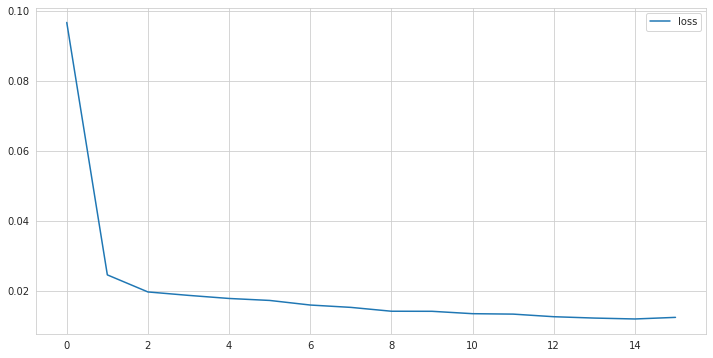

In [84]:
losses = pd.DataFrame(model.history.history)        # create dataframe of losses
losses.plot()

### forecasting

In [85]:
df_fake = val.iloc[:,1:]                        # create fake dataframe
df_fake

,t1,hum,wind_speed,is_holiday,is_weekend,hour,weather_code_clear,weather_code_cloudy,weather_code_light_rain,weather_code_rain_thunderstorm,weather_code_scattered_clouds,weather_code_snowfall,season_name_spring,season_name_summer,season_name_winter
timestamp,,,,,,,,,,,,,,,
2017-01-03 00:00:00,-1.438,0.775,-0.381,0.000,0.000,0,1,0,0,0,0,0,0,0,1
2017-01-03 01:00:00,-1.438,0.625,-0.476,0.000,0.000,1,1,0,0,0,0,0,0,0,1
2017-01-03 02:00:00,-1.500,0.775,-0.381,0.000,0.000,2,1,0,0,0,0,0,0,0,1
2017-01-03 03:00:00,-1.562,0.925,-0.190,0.000,0.000,3,1,0,0,0,0,0,0,0,1
2017-01-03 04:00:00,-1.562,0.925,-0.095,0.000,0.000,4,1,0,0,0,0,0,0,0,1
2017-01-03 05:00:00,-1.500,0.775,-0.095,0.000,0.000,5,0,0,0,0,0,0,0,0,1
2017-01-03 06:00:00,-1.438,0.625,0.286,0.000,0.000,6,1,0,0,0,0,0,0,0,1
2017-01-03 07:00:00,-1.438,0.625,0.381,0.000,0.000,7,1,0,0,0,0,0,0,0,1
2017-01-03 08:00:00,-1.438,0.625,0.333,0.000,0.000,8,0,0,0,0,0,0,0,0,1


In [86]:
reel = np.array(val.iloc[:,:1])                 # create reel array
reel.reshape((1,-1))[0]

array([-5.51943463e-01, -5.61837456e-01, -5.66077739e-01, -5.89399293e-01,
       -5.75265018e-01, -5.37809187e-01, -2.89752650e-01,  3.97879859e-01,
        1.45583039e+00,  3.62544170e-01, -1.29328622e-01, -1.46996466e-01,
       -1.34275618e-02,  2.40282686e-02, -5.58303887e-02,  7.06713781e-04,
        2.52296820e-01,  1.34134276e+00,  9.72438163e-01,  1.39929329e-01,
       -2.14134276e-01, -3.58303887e-01, -4.38162544e-01, -4.98233216e-01])

### First way : after each prediction, reel value will be use for next prediction

In [87]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [88]:
eval_metrics(reel.reshape((1,-1))[0], forecast)                        # check metrics

r2_score: 0.7575884174839684 
mae: 0.1416383500569922 
mse: 0.07951298732176165 
rmse: 0.28198047329870496


In [89]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))           # inverse transform  predictions
forecast

array([[ 2.7263916e+01, -4.2403137e+01, -7.1632568e+01, -2.3720276e+01,
        -3.9039062e+01,  2.6365967e+00,  3.3433582e+02,  1.1496340e+03,
         2.8782109e+03,  1.5490735e+03,  7.3531744e+02,  5.3751196e+02,
         6.6988672e+02,  9.2269531e+02,  8.4215326e+02,  7.1938934e+02,
         9.1853149e+02,  1.7359934e+03,  3.7921372e+03,  1.2317483e+03,
         5.9694672e+02,  2.7096490e+02,  1.8590521e+02,  1.1456378e+02]],
      dtype=float32)

In [90]:
forecast_index = pd.date_range(start = '2017-01-04 00:00:00', periods = periods, freq = 'H')                # create index

In [91]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])          # create dataframe for forecast

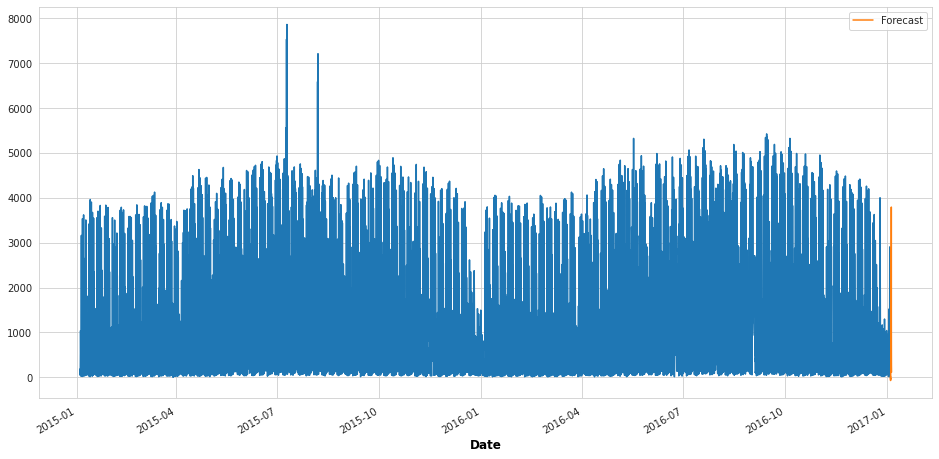

In [92]:
ax = df["cnt"].plot()                                                               # plot  forecast
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlabel("Date", fontsize = 12,   fontweight = 'bold', color = 'black');

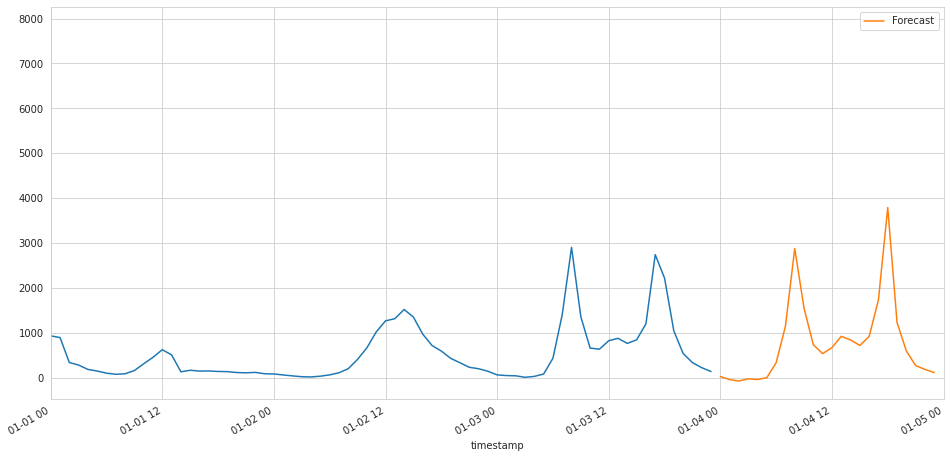

In [93]:
ax = df["cnt"].plot()                                                              # plot  forecast
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01 00:00:00' ,'2017-01-05 00:00:00' );

### Second way : after each prediction, result will be use for next prediction

In [94]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [95]:
eval_metrics(reel.reshape((1,-1))[0], forecast)                                # check metrics

r2_score: 0.4421065557626027 
mae: 0.3012080810302638 
mse: 0.18299362554430929 
rmse: 0.42777754212243224


In [96]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))                       # inverse transform  predictions
forecast

array([[  27.263916,  -62.622925, -134.7091  , -137.117   , -147.24268 ,
        -162.62634 ,   42.047607,  669.1457  , 1742.1163  , 1713.5302  ,
        1036.1785  ,  773.18805 ,  703.3024  ,  739.3701  ,  820.1529  ,
         824.5812  ,  806.66174 ,  875.6336  , 1386.0322  , 1897.8727  ,
        1451.8137  ,  830.1665  ,  521.52185 ,  324.4389  ]],
      dtype=float32)

In [97]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])      # create dataframe for forecast

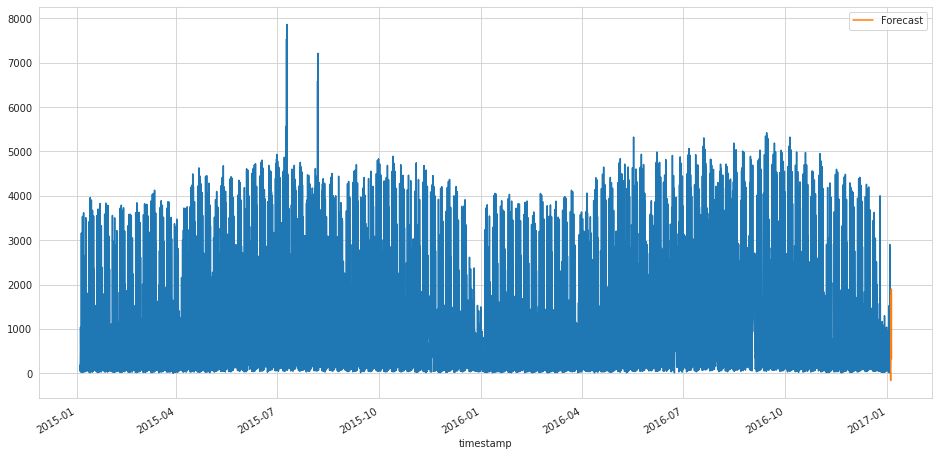

In [98]:
ax = df["cnt"].plot()                                                                                    # plot  forecast
forecast_df.plot(ax = ax, figsize = (16, 8));

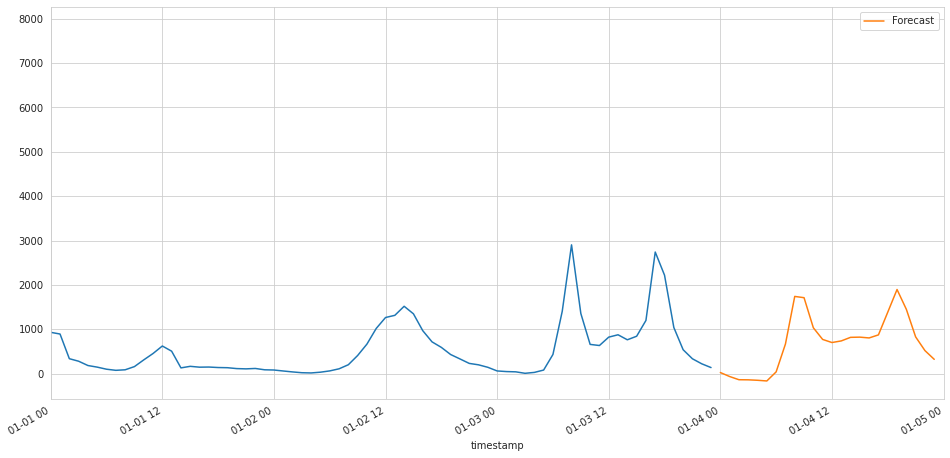

In [99]:
ax = df["cnt"].plot()                                                                                            # plot  forecast
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01 00:00:00' ,'2017-01-05 00:00:00' );

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___